## Importing Necessay Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import r2_score

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM,Bidirectional,Embedding
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PRIYANSHU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
df=pd.read_csv('data/train.csv')
df.head(20)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


## Data Preprocessing

In [4]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
df=df.dropna()
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(18285, 5)

In [8]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [9]:
df=df.drop('id',axis=1)
df.head(10)

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [10]:
X=df.drop('label',axis=1)
y=df['label']

In [11]:
# 0-Fake , 1-True

y.value_counts()

0    10361
1     7924
Name: label, dtype: int64

In [12]:
messages=X.copy()

In [13]:
messages.reset_index(inplace=True)

In [14]:
def process(res):

  str=re.findall("[a-zA-Z]+",res)
  
  stop_words = set(stopwords.words('english'))
  str = [word for word in str if word.lower() not in stop_words]

  str=(" ".join(str))
  str=str.lower()
  return str


In [15]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [16]:
corp= []
for i in range(0, len(messages)):
    res=process(messages['title'][i])
    corp.append(res)

In [17]:
len(corp)

18285

## Word Embedding

In [18]:
voc_size=10000

In [19]:
onehot_rep=[]
for words in corp:
  onehot_rep.append(one_hot(words,voc_size))
print(onehot_rep)

[[5327, 8656, 4709, 3513, 9367, 7068, 2417, 9979, 7577, 6643], [583, 8592, 4110, 6933, 318, 4056, 4179], [2255, 3468, 5132, 1880], [5569, 6510, 4462, 6161, 5640, 625], [2674, 318, 1630, 3957, 1421, 5912, 318, 8550, 9540, 754], [5867, 5153, 3686, 3820, 4959, 6185, 8943, 7461, 5022, 2522, 6289, 5074, 3988, 5786, 4179], [5310, 8495, 6788, 4583, 4646, 5671, 9977, 7412, 3431, 554, 3950], [3420, 4305, 696, 5248, 7774, 4236, 6185, 3671, 3431, 554, 3950], [4595, 6999, 9775, 5294, 6214, 7734, 9583, 8396, 6185, 5129], [3492, 9422, 3735, 2365, 5937, 3639, 3920, 2593], [325, 2306, 9932, 3492, 8710, 3571, 9007, 8222, 3326, 3630, 2461], [6161, 3522, 9367, 5130, 6185, 7774], [3768, 1835, 6497, 5615, 2916, 2543, 7379, 5359, 3047], [5414, 6968, 38, 7966, 1891, 3596, 8307, 3431, 554, 3950], [2452, 6862, 2706, 735, 5908, 3431, 554, 3950], [4887, 3761, 6749, 3455, 7552, 5704, 6027, 5388, 6539, 6525], [5801, 7373, 8592], [7235, 7619, 8817, 3074, 6185, 8528, 7318, 4179], [9587, 6487, 4110, 9191, 5539, 2078,

In [20]:
sent_length=20
emb_docs=pad_sequences(onehot_rep,padding='pre',maxlen=sent_length)
emb_docs

array([[   0,    0,    0, ..., 9979, 7577, 6643],
       [   0,    0,    0, ...,  318, 4056, 4179],
       [   0,    0,    0, ..., 3468, 5132, 1880],
       ...,
       [   0,    0,    0, ..., 3431,  554, 3950],
       [   0,    0,    0, ..., 3985, 9888, 7856],
       [   0,    0,    0, ..., 4408, 9162, 1100]])

In [21]:
X=np.array(emb_docs)
y=np.array(y)

In [86]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2,random_state=7)
X_train.shape, X_valid.shape

((14628, 20), (3657, 20))

In [87]:
dim=50

model=Sequential()

model.add(Embedding(voc_size,dim,input_length=sent_length))

model.add(Bidirectional(LSTM(50, return_sequences=True)))
model.add(Dropout(0.3))

model.add(Bidirectional(LSTM(50)))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

In [88]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 20, 50)            500000    
_________________________________________________________________
bidirectional_16 (Bidirectio (None, 20, 100)           40400     
_________________________________________________________________
dropout_16 (Dropout)         (None, 20, 100)           0         
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 100)               60400     
_________________________________________________________________
dropout_17 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 600,901
Trainable params: 600,901
Non-trainable params: 0
________________________________________________

In [89]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [90]:
history=model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=10,batch_size=64)

Train on 14628 samples, validate on 3657 samples
Epoch 1/10
14628/14628 [==============================] - 11s 742us/sample - loss: 0.2752 - accuracy: 0.8718 - val_loss: 0.1903 - val_accuracy: 0.9232
Epoch 2/10
14628/14628 [==============================] - 5s 312us/sample - loss: 0.1139 - accuracy: 0.9573 - val_loss: 0.2053 - val_accuracy: 0.9226
Epoch 3/10
14628/14628 [==============================] - 5s 318us/sample - loss: 0.0668 - accuracy: 0.9778 - val_loss: 0.2469 - val_accuracy: 0.9199
Epoch 4/10
14628/14628 [==============================] - 5s 328us/sample - loss: 0.0391 - accuracy: 0.9879 - val_loss: 0.2860 - val_accuracy: 0.9177
Epoch 5/10
14628/14628 [==============================] - 5s 313us/sample - loss: 0.0188 - accuracy: 0.9946 - val_loss: 0.3658 - val_accuracy: 0.9122
Epoch 6/10
14628/14628 [==============================] - 5s 310us/sample - loss: 0.0090 - accuracy: 0.9978 - val_loss: 0.4814 - val_accuracy: 0.9111
Epoch 7/10
14628/14628 [==========================

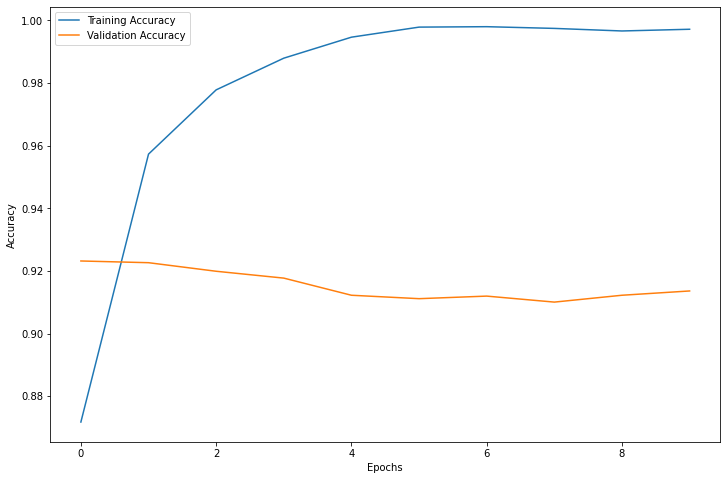

In [91]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [92]:
y_pred=model.predict_classes(X_valid)

In [93]:
accuracy_score(y_valid,y_pred)

0.9135903746240087

In [94]:
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2077
           1       0.90      0.90      0.90      1580

    accuracy                           0.91      3657
   macro avg       0.91      0.91      0.91      3657
weighted avg       0.91      0.91      0.91      3657



## User Prediction

In [95]:
news=str(input("Enter news title less than 20 words:"))


tokenizer = Tokenizer()
tokenizer.fit_on_texts([news])

news

''

In [96]:
news_cleaned=process(news)
news_cleaned

''

In [97]:
onehot_rep_test=[]
onehot_rep_test.append(one_hot(news_cleaned,voc_size))

emb_docs_test=pad_sequences(onehot_rep_test,padding='pre',maxlen=sent_length)

In [98]:
pred=model.predict(emb_docs_test)

if pred<0.9:
    print("It is a fake news")
else:
    print("It is a true news")


It is a true news
